1. Fourieranalyse lang andauernder Signale

c) Bestimmen Sie mithilfe Ihres Codes aus Versuch 3 das Amplitudenspektrum des ausgeschnittenen Signals und stellen Sie dieses graphisch dar.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgl
import scipy as sp
import os

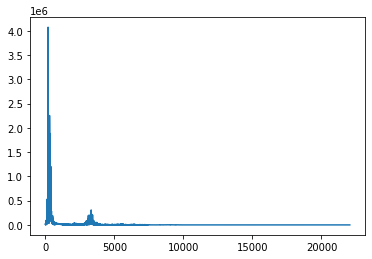

In [5]:
%matplotlib inline
sample = np.load(f"audiodateien/trigger/sebi_tief1.npy")
plt.plot(np.abs(np.fft.fft(sample))[0:len(sample)//2]);

d) Implementieren Sie die in der Vorlesung gezeigte Methode des Windowing. Zerlegen Sie
dazu das Signal in Abschnitte mit einer Länge von 512 Samples, die sich jeweils zur
Hälfte überlappen. Gewichten Sie die Samples in jedem Fenster mit einer Gaußschen
Fensterfunktion, die so gewählt wird, dass die Fensterbreite 4 Standardabweichungen
entspricht. Führen Sie in jedem Fenster eine lokale Fouriertransformation durch und
mitteln Sie dann die Fouriertransformierte über alle Fenster. Berechnen Sie daraus
wieder das Amplitudenspektrum und überprüfen Sie die Korrektheit durch Vergleich der
graphischen Darstellung mit dem Spektrum aus der vorigen Teilaufgabe.

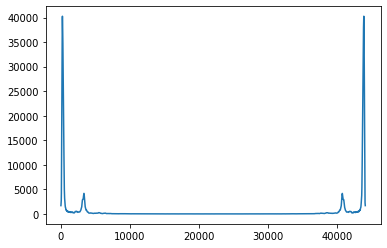

In [6]:
%matplotlib inline
def zerteilen(array):
    gauss_window = np.array(sgl.gaussian(512, 512 / 4))
    for i in range(0, len(array) - 512 + 1, 256):
        yield np.concatenate([[0] * i, list(gauss_window * array[i:i + 512]), [0] * (len(array) - (i + 512))])

def windowing_func(array):
    window = np.array(list(zerteilen(array)))
    return np.abs(np.fft.fft(window)).mean(0)

windowed_sample = windowing_func(sample)

plt.plot(windowed_sample);

2. Spracherkennung

a) Für den Spracherkenner brauchen wir zunächst die Referenzspektren für die vier Befehle
”Hoch”, ”Tief”, ”Links” und ”Rechts”. Nehmen Sie dazu jeweils 5 Beispiele pro Befehl auf
und berechnen Sie deren Spektren mit der Windowing-Methode aus Aufgabe 1. Achten
Sie darauf, das die 5 Beispiele vom selben Sprecher stammen. Das Referenzspektrum
erhalten Sie durch Mittelung über die 5 Spektren. Stellen Sie Ihre 4 Referenzspektren im
Protokoll graphisch dar.

In [7]:
windowed_tief = []
windowed_hoch = []
windowed_links = []
windowed_rechts = []
windowed_tief_s = []
windowed_hoch_s = []
windowed_links_s = []
windowed_rechts_s = []
for i in range(1,6):
    windowed_tief.append(windowing_func(np.load(f"audiodateien/trigger/max_tief{i}.npy")))
    windowed_hoch.append(windowing_func(np.load(f"audiodateien/trigger/max_hoch{i}.npy")))
    windowed_links.append(windowing_func(np.load(f"audiodateien/trigger/max_links{i}.npy")))
    windowed_rechts.append(windowing_func(np.load(f"audiodateien/trigger/max_rechts{i}.npy")))
    windowed_tief_s.append(windowing_func(np.load(f"audiodateien/trigger/sebi_tief{i}.npy")))
    windowed_hoch_s.append(windowing_func(np.load(f"audiodateien/trigger/sebi_hoch{i}.npy")))
    windowed_links_s.append(windowing_func(np.load(f"audiodateien/trigger/sebi_links{i}.npy")))
    windowed_rechts_s.append(windowing_func(np.load(f"audiodateien/trigger/sebi_rechts{i}.npy")))


In [23]:
print(windowed_rechts)

[array([2570.0025263 , 2573.72985135, 2583.91518602, ..., 2599.62015082,
       2583.91518602, 2573.72985135]), array([2515.32674199, 2521.05465943, 2536.39911917, ..., 2559.16071302,
       2536.39911917, 2521.05465943]), array([2343.99653022, 2351.21943055, 2367.97854581, ..., 2391.5131851 ,
       2367.97854581, 2351.21943055]), array([2379.75734122, 2384.52101697, 2396.67429646, ..., 2414.12617192,
       2396.67429646, 2384.52101697]), array([2017.20184131, 2024.85552809, 2041.4036126 , ..., 2063.97686102,
       2041.4036126 , 2024.85552809])]


In [21]:
np.array(windowed_hoch).shape

<ipython-input-21-aeff38f365a9>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(windowed_hoch).shape


(5,)

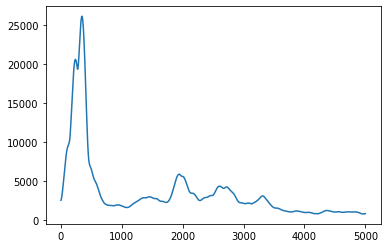

In [8]:
%matplotlib inline
plt.plot(windowed_tief[0][0:5000]);

In [9]:
%matplotlib inline
mean_tief = np.mean(windowed_tief, axis = 0)
mean_hoch = np.mean(windowed_hoch, axis = 0)
mean_links = np.mean(windowed_links, axis = 0)
mean_rechts = np.mean(windowed_rechts, axis = 0)
plt.plot(mean_tief)
plt.plot(mean_hoch)
plt.plot(mean_links)
plt.plot(mean_rechts)
plt.xlim([0,5000]);


C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: operands could not be broadcast together with shapes (34303,) (44100,) 

In [75]:
mean_tief_s = np.mean(windowed_tief_s, axis = 0)
mean_hoch_s = np.mean(windowed_hoch_s, axis = 0)
mean_links_s = np.mean(windowed_links_s, axis = 0)
mean_rechts_s = np.mean(windowed_rechts_s, axis = 0)

c) Schreiben Sie eine Python-Routine zur Berechnung des Korrelationskoeffizienten nach
Bravais-Pearson zum Vergleich zweier Eingabespektren. Testen Sie die Routine an ihren
Referenzspektren: beim Vergleich identischer Spektren sollte die Korrelation 1 sein, bei
verschiedenen Spektren nahe an 0.

In [76]:
test_spectrum_tief = windowing_func(np.load(f"samplescut/npy_sample_tief6.npy"))
cov_right = sp.stats.pearsonr(test_spectrum_tief, mean_tief)
cov_wrong = sp.stats.pearsonr(test_spectrum_tief, mean_rechts)
cov_wrong1 = sp.stats.pearsonr(test_spectrum_tief, mean_links)
cov_wrong2 = sp.stats.pearsonr(test_spectrum_tief, mean_hoch)
print(f"Korrelation Tief-Tief: {cov_right[0]}")
print(f"Korrelation Tief-Rechts: {cov_wrong[0]}")
print(f"Korrelation Tief-Links: {cov_wrong1[0]}")
print(f"Korrelation Tief-Hoch: {cov_wrong2[0]}")

Korrelation Tief-Tief: 0.9874967727551456
Korrelation Tief-Rechts: 0.8104280466440656
Korrelation Tief-Links: 0.9532598656154122
Korrelation Tief-Hoch: 0.7793206327068685


d) Implementieren Sie den Spracherkenner nach der oben gezeigten Architektur und testen
Sie ihn an beiden Datensätzen. Geben Sie jeweils an, wie viel Prozent der Testdatensätze korrekt bzw. falsch erkannt wurden (d.h. die Detektions- und die Fehlerrate) und
diskutieren Sie das Ergebnis.

In [77]:
def spracherkenner(spektrum):
    referenz_spektren = [mean_hoch, mean_links, mean_rechts, mean_tief, mean_hoch_s, mean_links_s, mean_rechts_s, mean_tief_s]
    cor = 0
    idx = 0
    name = ""
    befehl = ""
    for i in range(len(referenz_spektren)):
        cov = sp.stats.pearsonr(spektrum, referenz_spektren[i])[0]
        if cov > cor:
            cor = cov
            idx = i
    if idx >= 4:
        name = "Sebi"
    else:
        name = "Max"
    idxm = idx % 4
    if idxm == 0:
        befehl = "Hoch"
    elif idxm == 1:
        befehl = "Links"
    elif idxm == 2:
        befehl = "Rechts"
    else:
        befehl = "Tief"
    return f"{name} => {befehl} ({np.round(cor,decimals=5)*100}%)"

In [78]:
testspektrum = windowing_func(np.load(f"samplescut/npy_sample_seb_rechts6.npy"))
spracherkenner(testspektrum)

'Sebi => Rechts (97.783%)'

In [83]:
directories = os.listdir("samplescut")
loaded = [(windowing_func(np.load(f"samplescut/{x}")),x) for x in directories]    

In [ ]:
loaded

In [92]:
for e in loaded:
    data = e[0]
    name = "_".join(e[1].split("_")[2:])
    out = spracherkenner(data)
    print(f"{name} ::::::==> {out}")

links1.npy ::::::==> Max => Links (99.82799999999999%)
links3.npy ::::::==> Max => Links (99.821%)
links2.npy ::::::==> Max => Links (99.895%)
links6.npy ::::::==> Max => Links (99.631%)
links5.npy ::::::==> Max => Links (99.777%)
links4.npy ::::::==> Max => Links (99.925%)
tief6.npy ::::::==> Max => Tief (98.75%)
seb_links4.npy ::::::==> Sebi => Links (98.295%)
seb_tief6.npy ::::::==> Sebi => Tief (97.833%)
seb_links5.npy ::::::==> Sebi => Links (96.05%)
seb_rechts1.npy ::::::==> Sebi => Rechts (99.48599999999999%)
seb_rechts3.npy ::::::==> Sebi => Rechts (97.005%)
tief5.npy ::::::==> Max => Tief (99.812%)
seb_tief5.npy ::::::==> Sebi => Links (94.556%)
seb_tief4.npy ::::::==> Sebi => Tief (97.977%)
 ::::::==> Sebi => Rechts (84.18900000000001%)
seb_links6.npy ::::::==> Sebi => Links (98.644%)
tief4.npy ::::::==> Max => Tief (99.836%)
seb_rechts2.npy ::::::==> Sebi => Rechts (98.89099999999999%)
seb_rechts6.npy ::::::==> Sebi => Rechts (97.783%)
seb_links2.npy ::::::==> Sebi => Links 